<a href="https://colab.research.google.com/github/NOURSALEM78/Stcdataset/blob/main/Stc_TV_Dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
stcdata = pd.read_excel("stc TV Data Set_T2 .xlsx")

In [4]:
print(stcdata.head())  # عرض أول 5 صفوف

   Unnamed: 0      date_  Total_watch_time_in_houres
0           0 2018-01-01                 1123.551944
1           1 2018-01-02                 1000.129722
2           2 2018-01-03                  881.924444
3           3 2018-01-04                  782.669444
4           4 2018-01-05                 1051.939444


In [7]:
print(stcdata.info())  # معرفة أنواع البيانات

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  86 non-null     int64         
 1   date_                       86 non-null     datetime64[ns]
 2   Total_watch_time_in_houres  86 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.1 KB
None


In [9]:
datastc1 = stcdata.drop(columns=["Unnamed: 0"])
print(datastc1.info)

<bound method DataFrame.info of         date_  Total_watch_time_in_houres
0  2018-01-01                 1123.551944
1  2018-01-02                 1000.129722
2  2018-01-03                  881.924444
3  2018-01-04                  782.669444
4  2018-01-05                 1051.939444
..        ...                         ...
81 2018-04-24                  652.625278
82 2018-04-25                  650.428889
83 2018-04-26                  675.184444
84 2018-04-27                  601.738056
85 2018-04-30                  609.281667

[86 rows x 2 columns]>


In [10]:
print(datastc1.describe())  # إحصائيات أساسية

                               date_  Total_watch_time_in_houres
count                             86                   86.000000
mean   2018-02-28 17:01:23.720930304                  780.817926
min              2018-01-01 00:00:00                  562.124722
25%              2018-01-30 06:00:00                  707.709653
50%              2018-02-28 12:00:00                  763.181389
75%              2018-03-29 18:00:00                  840.985278
max              2018-04-30 00:00:00                 1123.551944
std                              NaN                  122.992002


In [12]:
datastc1["month"] = datastc1["date_"].dt.month  # رقم الشهر
datastc1["day"] = datastc1["date_"].dt.day  # رقم اليوم
datastc1["weekday"] = datastc1["date_"].dt.weekday  # يوم الأسبوع (0=الإثنين)
print(datastc1.head())

       date_  Total_watch_time_in_houres  month  day  weekday
0 2018-01-01                 1123.551944      1    1        0
1 2018-01-02                 1000.129722      1    2        1
2 2018-01-03                  881.924444      1    3        2
3 2018-01-04                  782.669444      1    4        3
4 2018-01-05                 1051.939444      1    5        4


In [14]:
X = datastc1[["month", "day", "weekday"]]  # الميزات المدخلة
y = datastc1["Total_watch_time_in_houres"]  # المتغير المستهدف

print("\n📌 شكل البيانات المدخلة (X):")
print(X.head())

print("\n📌 شكل البيانات المستهدفة (y):")
print(y.head())


📌 شكل البيانات المدخلة (X):
   month  day  weekday
0      1    1        0
1      1    2        1
2      1    3        2
3      1    4        3
4      1    5        4

📌 شكل البيانات المستهدفة (y):
0    1123.551944
1    1000.129722
2     881.924444
3     782.669444
4    1051.939444
Name: Total_watch_time_in_houres, dtype: float64


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n📌 حجم بيانات التدريب:")
print(X_train.shape, y_train.shape)

print("\n📌 حجم بيانات الاختبار:")
print(X_test.shape, y_test.shape)


📌 حجم بيانات التدريب:
(68, 3) (68,)

📌 حجم بيانات الاختبار:
(18, 3) (18,)


In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

print("\n📌 تم تدريب النموذج بنجاح!")
print("📌 معاملات النموذج (Coefficients):", model.coef_)
print("📌 الثابت (Intercept):", model.intercept_)


📌 تم تدريب النموذج بنجاح!
📌 معاملات النموذج (Coefficients): [-54.35390036  -3.25176403  -3.3682544 ]
📌 الثابت (Intercept): 981.4591870973271


In [23]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\n📌 تقييم النموذج:")
print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")
print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")



📌 تقييم النموذج:
🔹 Mean Absolute Error (MAE): 89.67
🔹 Mean Squared Error (MSE): 11172.97


In [24]:
future_dates = pd.date_range(start=datastc1["date_"].max(), periods=60, freq="D") # Changed df to datastc1
future_df = pd.DataFrame({
    "month": future_dates.month,
    "day": future_dates.day,
    "weekday": future_dates.weekday
})

future_predictions = model.predict(future_df)

print("\n📌 التنبؤات لأول 5 أيام قادمة:")
for date, pred in zip(future_dates[:5], future_predictions[:5]):
    print(f"{date.date()} → {pred:.2f} ساعة مشاهدة")


📌 التنبؤات لأول 5 أيام قادمة:
2018-04-30 → 666.49 ساعة مشاهدة
2018-05-01 → 703.07 ساعة مشاهدة
2018-05-02 → 696.45 ساعة مشاهدة
2018-05-03 → 689.83 ساعة مشاهدة
2018-05-04 → 683.21 ساعة مشاهدة


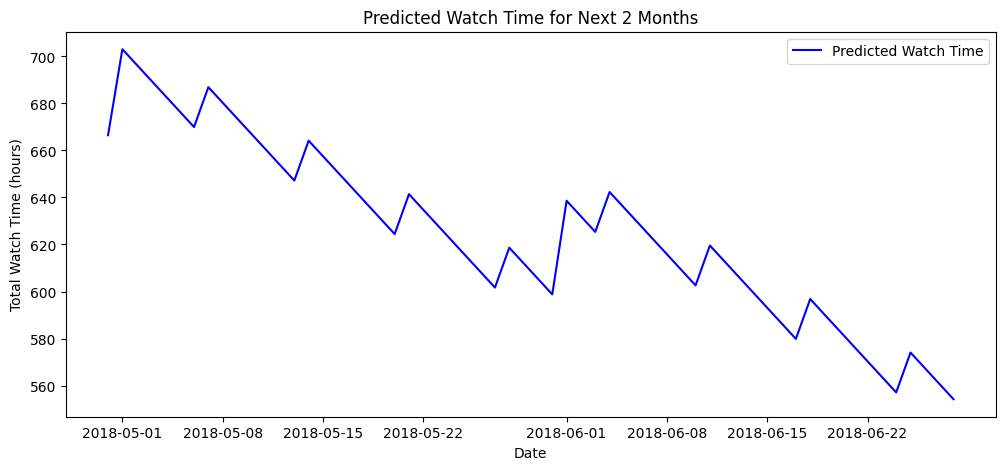

In [25]:

plt.figure(figsize=(12, 5))
plt.plot(future_dates, future_predictions, label="Predicted Watch Time", color="blue")
plt.xlabel("Date")
plt.ylabel("Total Watch Time (hours)")
plt.title("Predicted Watch Time for Next 2 Months")
plt.legend()
plt.show()
